In [1]:
%matplotlib inline


# Within Session SSVEP

This Example show how to perform a within-session SSVEP analysis on the
MAMEM dataset 3, using a CCA pipeline.

The within-session evaluation assesses the performance of a classification
pipeline using a 5-fold cross-validation. The reported metric (here, accuracy)
is the average of all fold.


In [2]:
# Authors: Sylvain Chevallier <sylvain.chevallier@uvsq.fr>
#
# License: BSD (3-clause)

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import MAMEM3
from moabb.evaluations import WithinSessionEvaluation
from moabb.paradigms import SSVEP
from moabb.pipelines import SSVEP_CCA


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
moabb.set_log_level("info")

## Loading Dataset

Load 2 subjects of MAMEM3 dataset



In [3]:
#subj = [1, 3]
dataset = MAMEM3()
#dataset.subject_list = subj

## Choose Paradigm

We select the paradigm SSVEP, applying a bandpass filter (3-15 Hz) on
the data and we keep only the first 3 classes, that is stimulation
frequency of 6.66, 7.50 and 8.57 Hz.



In [4]:
paradigm = SSVEP(fmin=3, fmax=15, n_classes=3)

2024-07-25 17:27:50,222 WARNING MainThread moabb.paradigms.ssvep Choosing the first 3 classes from all possible events


## Create Pipelines

Use a Canonical Correlation Analysis classifier



In [5]:
interval = dataset.interval
freqs = paradigm.used_events(dataset)

pipeline = {}
pipeline["CCA"] = make_pipeline(SSVEP_CCA(interval=interval, freqs=freqs, n_harmonics=3))

## Get Data (optional)

To get access to the EEG signals downloaded from the dataset, you could
use `dataset.get_data(subjects=[subject_id])` to obtain the EEG under
MNE format, stored in a dictionary of sessions and runs.
Otherwise, `paradigm.get_data(dataset=dataset, subjects=[subject_id])`
allows to obtain the EEG data in scikit format, the labels and the meta
information. In `paradigm.get_data`, the EEG are preprocessed according
to the paradigm requirement.



In [6]:
# sessions = dataset.get_data(subjects=[3])
# X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[3])

## Evaluation

The evaluation will return a DataFrame containing a single AUC score for
each subject and pipeline.



In [7]:
overwrite = True  # set to True if we want to overwrite cached results

evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=dataset, suffix="examples", overwrite=overwrite
)
results = evaluation.process(pipeline)

print(results.head())

2024-07-25 17:27:50,240 INFO MainThread moabb.evaluations.base Processing dataset: MAMEM3
MAMEM3-WithinSession:   0%|          | 0/10 [00:00<?, ?it/s]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/dat

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  80%|████████  | 8/10 [03:00<00:57, 29.00s/it]Downloading file '27901626' from 'https://ndownloader.figshare.com/files/27901626' to '/Users/skpaul/mne_data/MNE-mamem3-data'.
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library

No hdf5_path provided, models will not be saved.


/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 3
 '7.50': 0
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good), 1 – 4 s, baseline off, ~194 kB, data loaded,
 '6.66': 1
 '7.50': 0

No hdf5_path provided, models will not be saved.
      score      time  samples subject session  channels  n_sessions dataset  \
0  0.688889  0.023047     45.0       1       0        14           1  MAMEM3   
1  0.866667  0.022718     45.0       2       0        14           1  MAMEM3   
2  0.266667  0.022301     45.0       3       0        14           1  MAMEM3   
3  0.622222  0.022320     45.0       4       0        14           1  MAMEM3   
4  0.555556  0.022688     45.0       5       0        14           1  MAMEM3   

  pipeline  
0      CCA  
1      CCA  
2      CCA  
3      CCA  
4      CCA  


## Plot Results

Here we plot the results, indicating the score for each subject



In [10]:
results

,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.688889,0.023047,45.0,1,0,14,1,MAMEM3,CCA
1,0.866667,0.022718,45.0,2,0,14,1,MAMEM3,CCA
2,0.266667,0.022301,45.0,3,0,14,1,MAMEM3,CCA
3,0.622222,0.022320,45.0,4,0,14,1,MAMEM3,CCA
4,0.555556,0.022688,45.0,5,0,14,1,MAMEM3,CCA
5,0.377778,0.023114,45.0,6,0,14,1,MAMEM3,CCA
6,0.511111,0.021483,45.0,7,0,14,1,MAMEM3,CCA
7,0.288889,0.038236,45.0,8,0,14,1,MAMEM3,CCA
8,0.888889,0.024042,45.0,9,0,14,1,MAMEM3,CCA
9,0.822222,0.024010,45.0,10,0,14,1,MAMEM3,CCA


<Axes: xlabel='session', ylabel='score'>

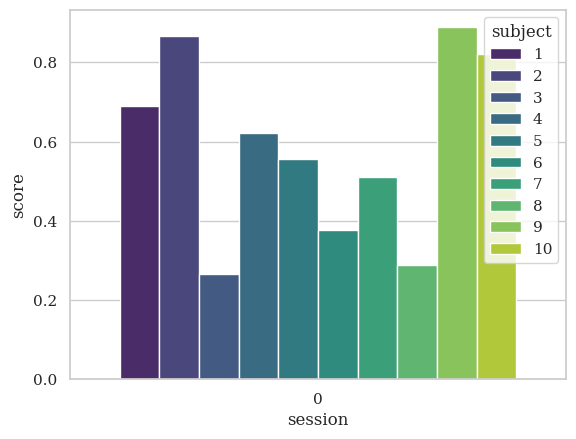

In [8]:
plt.figure()
sns.barplot(data=results, y="score", x="session", hue="subject", palette="viridis")

And the computation time in seconds



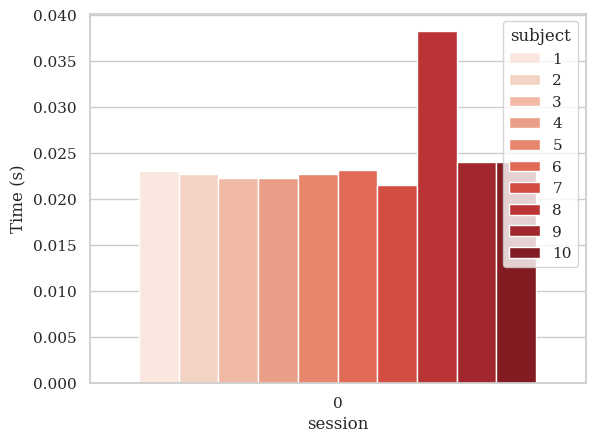

In [9]:
plt.figure()
ax = sns.barplot(data=results, y="time", x="session", hue="subject", palette="Reds")
ax.set_ylabel("Time (s)")
plt.show()